<a href="https://colab.research.google.com/github/malldisaesar/tugasw10/blob/main/ImgClassWeek10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [42]:
ls

3scene/          nnmodel_scene/   Untitled1.ipynb
forest_test.jpg  Untitled0.ipynb  Untitled2.ipynb


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
print("Loading Gus....")
imagePaths = paths.list_images("3scene")
data = []
labels = []

Loading Gus....


In [5]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [29]:
# perform a training and testing split, using 80% of the data for
# training and 20% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.20, shuffle=True)
print(trainX.shape)
print(testX.shape)

(758, 128, 128, 3)
(190, 128, 128, 3)


In [35]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(72, activation="relu", name="layer1"),
        Dense(36, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 72)                3539016   
_________________________________________________________________
layer2 (Dense)               (None, 36)                2628      
_________________________________________________________________
layer3 (Dense)               (None, 16)                592       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 3,542,287
Trainable params: 3,542,287
Non-trainable params: 0
_________________________________________________________________


In [37]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
24/24 [==============================] - 1s 42ms/step - loss: 1.7916 - accuracy: 0.3707 - val_loss: 1.1405 - val_accuracy: 0.3737
Epoch 2/25
24/24 [==============================] - 1s 35ms/step - loss: 1.0381 - accuracy: 0.4710 - val_loss: 0.9325 - val_accuracy: 0.5474
Epoch 3/25
24/24 [==============================] - 1s 35ms/step - loss: 0.9025 - accuracy: 0.4987 - val_loss: 0.8590 - val_accuracy: 0.6211
Epoch 4/25
24/24 [==============================] - 1s 34ms/step - loss: 0.8041 - accuracy: 0.6069 - val_loss: 0.8092 - val_accuracy: 0.6158
Epoch 5/25
24/24 [==============================] - 1s 35ms/step - loss: 0.7475 - accuracy: 0.6412 - val_loss: 0.8398 - val_accuracy: 0.5579
Epoch 6/25
24/24 [==============================] - 1s 35ms/step - loss: 0.7155 - accuracy: 0.6689 - val_loss: 0.7574 - val_accuracy: 0.6421
Epoch 7/25
24/24 [==============================] - 1s 36ms/step - loss: 0.6587 - accuracy: 0.7137 - val_loss: 0.6631 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


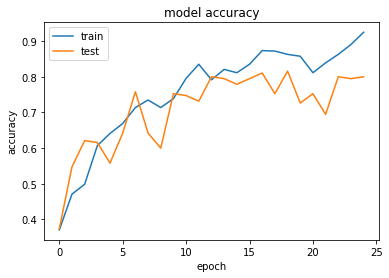

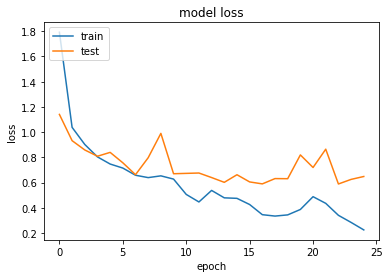

In [38]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.80      0.80      0.80        74
      forest       0.79      0.82      0.81        61
     highway       0.81      0.78      0.80        55

    accuracy                           0.80       190
   macro avg       0.80      0.80      0.80       190
weighted avg       0.80      0.80      0.80       190



In [40]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [43]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

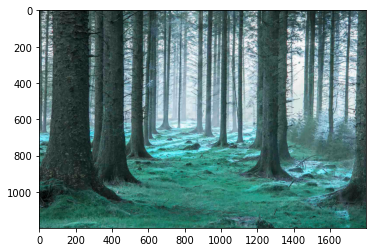

In [44]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [45]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [46]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)
